# Clustering Instacart Market Basket - with Sample data 

Approximate Execution time of the notebook: <b>2 minutes</b> <br>
All the cells can be executed in a run itself. <br>

This notebook encloses the following topics.
<ol>
<li>Dimensionality Reduction using SparsePCA</li>
<li>Clustering model training using different clustering algorithms</li>
<li>cluster validation using Silhouette coefficient </li>
<li>Data visualization</li>
<li>Cluster analysis</li>
</ol>

In [137]:
import numpy as np
import pandas as pd
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import Birch
from sklearn.cluster import MiniBatchKMeans
from sklearn import mixture

## Reading Sampled data

<b>Sample dataset size: </b>(42000, 66) <br>
<b>Original dataset size:</b> (206034,130)

In [138]:
user_purchase = pd.read_csv("data/cust_orders.gz")
print(user_purchase.shape)
user_purchase.head(10)

(42000, 66)


,user_id,frozen_dessert,dry_pasta,canned_fruit_applesauce,cookies_cakes,soup_broth_bouillon,frozen_juice,ice_cream_ice,protein_meal_replacements,milk,...,bakery_desserts,hot_dogs_bacon_sausage,juice_nectars,doughs_gelatins_bake_mixes,fresh_dips_tapenades,diapers_wipes,buns_rolls,trail_mix_snack_mix,deodorants,muscles_joints_pain_relief
0,199206,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,40077,0,0,0,0,0,0,0,0,12,...,0,0,0,0,0,0,0,0,0,0
2,103108,0,0,0,0,1,0,0,0,0,...,0,0,3,0,0,0,0,0,0,1
3,168497,0,6,0,7,0,0,7,1,11,...,0,0,3,1,2,0,0,0,0,0
4,190324,0,0,0,0,0,0,0,0,3,...,0,2,0,0,0,0,0,0,0,0
5,29126,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,142156,0,0,0,0,0,0,0,0,8,...,0,0,3,0,3,0,0,0,0,0
7,99648,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,78566,0,0,2,2,0,0,2,0,2,...,0,0,0,0,0,1,0,0,0,0
9,46344,0,0,0,1,0,0,1,0,1,...,0,0,4,0,0,0,0,0,0,0


## Dimensionality Reduction

Several values of the components are analysed with silhouette score and finalized the number of components as 3. <br>
The detailed exploration can be seen on Instacart-clustering-complete-analysis notebook.

In [139]:
"""
DIMENSIONALITY REDUCTION - using SparsePCA
Expected Execution time: It would take atmost 2 minutes
"""
pca_samples = SparsePCA(n_components=3).fit_transform(user_purchase.drop('user_id',axis=1))
print(pca_samples)

[[ 6.98147062 -0.80360345  2.69493178]
 [ 0.56970305 -3.14298976  4.69045462]
 [ 7.30311743  1.3800917   0.90003449]
 ...
 [ 7.11899921  0.99111672  1.67986269]
 [-0.40182698 -2.11420026  4.26304902]
 [-7.71410802 -2.28732389  5.80218018]]


In [140]:
#converting pca result to dataframe
dr_samples = pd.DataFrame(pca_samples)
print(dr_samples.shape)
dr_samples.head()

(42000, 3)


,0,1,2
0,6.981471,-0.803603,2.694932
1,0.569703,-3.142990,4.690455
2,7.303117,1.380092,0.900034
3,-7.462158,-4.740270,5.578513
4,6.598873,4.959320,-3.431307


In [141]:
"""
converting pca_samples to dataframes
"""
comp1 = 0
comp2 = 1
comp3 = 2
nclusters = 3

tocluster = pd.DataFrame(dr_samples)
print(tocluster.head())

          0         1         2
0  6.981471 -0.803603  2.694932
1  0.569703 -3.142990  4.690455
2  7.303117  1.380092  0.900034
3 -7.462158 -4.740270  5.578513
4  6.598873  4.959320 -3.431307


### Data Visualization after dimensionality reduction

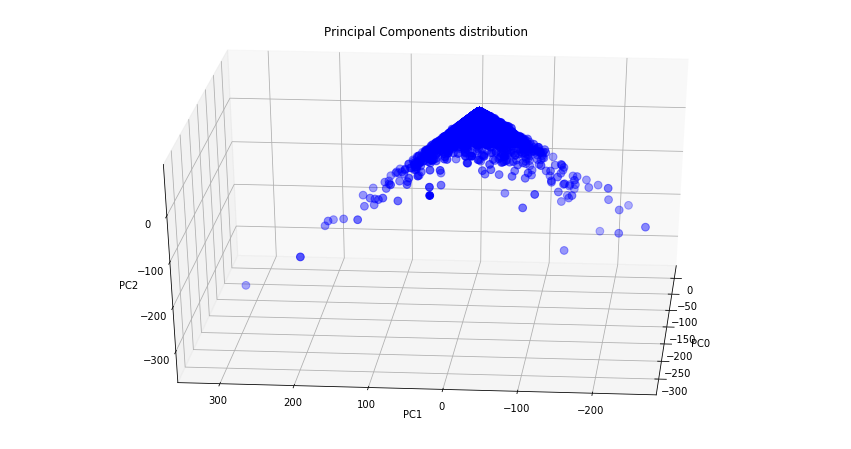

In [142]:
"""
DATA VISUALIZATION
plotting principal components in 3D space
"""
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dr_samples[comp1], dr_samples[comp2], dr_samples[comp3], c='blue', s=60)
ax.view_init(30, 185)
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.set_title('Principal Components distribution')
plt.show()

In [143]:
"""
CLUSTER VALIDITY - Silhouette Coefficient
Predicting silhouette score for formed clusters
"""
def find_silscore(tocluster, c_preds):
    return silhouette_score(tocluster, c_preds)

## Clustering Model Training

Clustering model is trained using KMeans and validated using Silhouette Coefficient. <br>
MiniBatchKMeans, KMeans, Birch, GaussianMixture, Spectral Clustering are the other algorithms explored. <br>
After the value of K is chosen using Elbow curve and verified with silhouette analysis, the clustering model is trained
with the different clustering algorithms and the clustering performance is analysed using Silhouette coefficent. <br>
<b>Finalized Algorithm: KMeans </b> <br>
#### Reasons for choosing KMeans
<ol>
<li>Better results on the cluster validity check comparing to the other clustering algorithms.</li>
<li>The data distribution seems not to have differing sizes/shapes/density which affects KMeans performance. Eventhough it has outliers, those are given importance in this problem since it denotes higher purchase rate.</li>
<li>Model training time is pretty fast in KMeans. Besides avoiding complex and memory consuming calculations like in spectral clustering or affinity propogation, KMeans also provides better performance</li>
</ol>

In [144]:
"""
CLUSTERING MODELS
created dictionary of various clustering models
"""
def get_clusterer(clusterer = "KMEANS", nclusters = 3):
    clusterer_dict = {
        "KMEANS": KMeans(n_clusters=nclusters, random_state=21),
        "MBKM": MiniBatchKMeans(init='k-means++', n_clusters=nclusters,
                      n_init=10, max_no_improvement=10, verbose=0),
        "BIRCH" : Birch(n_clusters=nclusters),
        "GM" : mixture.GaussianMixture(n_components=nclusters, covariance_type='full')
        #Spectralclustering takes too long time
        #"SC" : SpectralClustering(n_clusters=nclusters,assign_labels="discretize",random_state=21)
    }
    return clusterer_dict[clusterer]

In [145]:
"""
Clustering model training
"""

#Enter the clustering algorithm key, refer clusterer_dict in the above cell
clustering_algo = "KMEANS"
clusterer = get_clusterer(clusterer=clustering_algo, nclusters=nclusters)
clusterer.fit(tocluster)

if(clustering_algo == "KMEANS" ):
    centers = clusterer.cluster_centers_

c_preds = clusterer.predict(tocluster)
print(c_preds[0:100])

# To find silhouette score - uncomment the below lines if silhouette avg needs to be found
#silhouette_avg = find_silscore(tocluster, c_preds)
#print("Clusters count: ",nclusters," The average silhouette_score is :", silhouette_avg)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0]


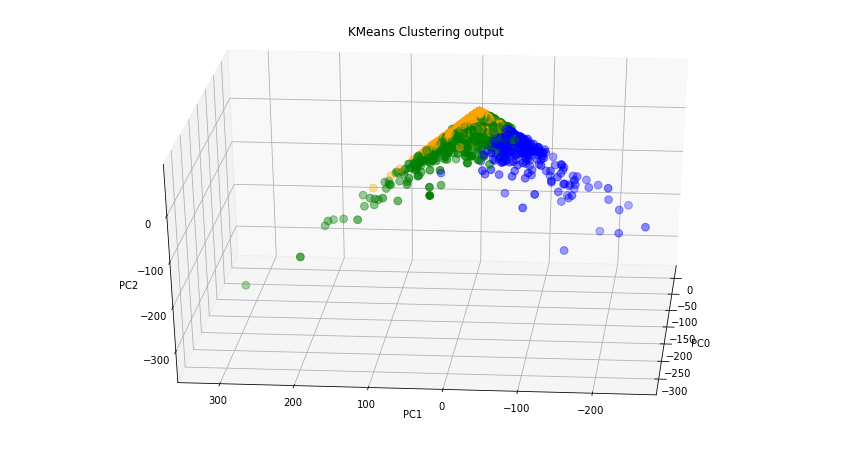

In [146]:
"""
To check how clusters are formed
"""
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

colors = ['orange','blue','green','purple']
#colors = ['orange','blue','green']
colored = [colors[k] for k in c_preds]
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dr_samples[0], dr_samples[1], dr_samples[2], c=colored, s=60)
ax.view_init(30, 185)
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
ax.set_title('KMeans Clustering output')
plt.show()

It is noticed from the silhouette analysis of KMeans clustering that mostly items are grouped into cluster 0(first cluster). So, Cluster 0 holds all the general products which is common among the customers. And, the other variations are captured in the remaining clusters.

In [147]:
prod_clusters = user_purchase.drop('user_id',axis=1).copy()
prod_clusters['cluster'] = c_preds

prod_clusters.head(20)

,frozen_dessert,dry_pasta,canned_fruit_applesauce,cookies_cakes,soup_broth_bouillon,frozen_juice,ice_cream_ice,protein_meal_replacements,milk,cleaning_products,...,hot_dogs_bacon_sausage,juice_nectars,doughs_gelatins_bake_mixes,fresh_dips_tapenades,diapers_wipes,buns_rolls,trail_mix_snack_mix,deodorants,muscles_joints_pain_relief,cluster
0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,12,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,3,...,0,3,0,0,0,0,0,0,1,0
3,0,6,0,7,0,0,7,1,11,0,...,0,3,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,3,0,...,2,0,0,0,0,0,0,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,8,0,...,0,3,0,3,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,2,2,0,0,2,0,2,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,1,0,1,0,...,0,4,0,0,0,0,0,0,0,0


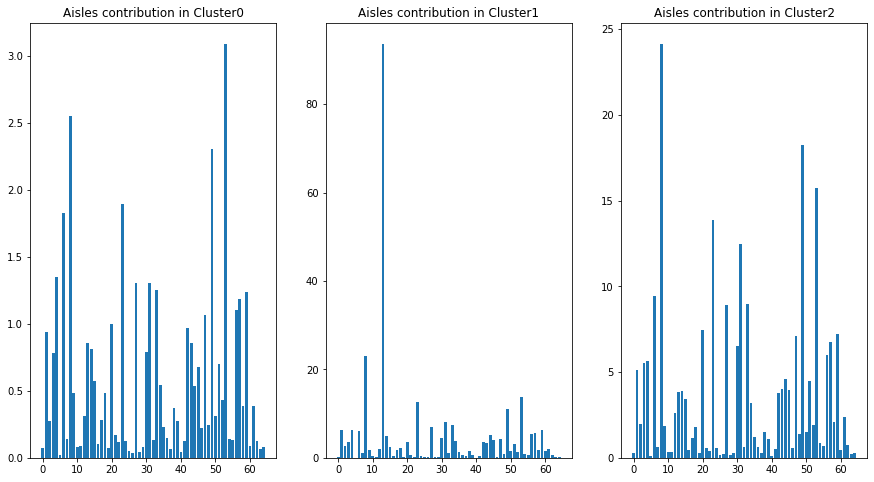

In [148]:
"""
Graph represents the distribution of aisles(product categories) in each cluster
"""
fig,(a1,a2,a3) = plt.subplots(1,3,sharex=True, figsize=(15,8))

c0 = prod_clusters[prod_clusters['cluster']==0].drop('cluster',axis=1).mean()
a1.bar(range(len(prod_clusters.drop('cluster',axis=1).columns)),c0)
a1.set_title('Aisles contribution in Cluster0')

c1 = prod_clusters[prod_clusters['cluster']==1].drop('cluster',axis=1).mean()
a2.bar(range(len(prod_clusters.drop('cluster',axis=1).columns)),c1)
a2.set_title('Aisles contribution in Cluster1')

c2 = prod_clusters[prod_clusters['cluster']==2].drop('cluster',axis=1).mean()
a3.bar(range(len(prod_clusters.drop('cluster',axis=1).columns)),c2)
a3.set_title('Aisles contribution in Cluster2')

plt.show()

In [149]:
c0.sort_values(ascending=False)[0:20]

water_seltzer_sparkling_water    3.092402
milk                             2.549802
chips_pretzels                   2.302873
bread                            1.892433
ice_cream_ice                    1.831015
soup_broth_bouillon              1.350777
energy_granola_bars              1.306540
lunch_meat                       1.303999
cereal                           1.253503
fresh_dips_tapenades             1.238312
juice_nectars                    1.188549
hot_dogs_bacon_sausage           1.102145
cream                            1.066473
candy_chocolate                  0.995469
paper_goods                      0.970299
dry_pasta                        0.939787
baby_food_formula                0.860742
condiments                       0.854116
pasta_sauce                      0.816034
breakfast_bakery                 0.786805
dtype: float64

In [150]:
c1.sort_values(ascending=False)[0:20]

baby_food_formula                93.698864
milk                             23.102273
water_seltzer_sparkling_water    13.849432
bread                            12.545455
chips_pretzels                   11.130682
energy_granola_bars               8.039773
cereal                            7.323864
lunch_meat                        6.997159
fresh_dips_tapenades              6.303977
soup_broth_bouillon               6.278409
dry_pasta                         6.201705
ice_cream_ice                     6.005682
juice_nectars                     5.627841
hot_dogs_bacon_sausage            5.383523
fruit_vegetable_snacks            5.201705
pasta_sauce                       5.036932
breakfast_bakery                  4.400568
cream                             4.153409
tortillas_flat_bread              3.963068
hot_cereal_pancake_mixes          3.696023
dtype: float64

In [151]:
c2.sort_values(ascending=False)[0:20]

milk                             24.154312
chips_pretzels                   18.267667
water_seltzer_sparkling_water    15.710989
bread                            13.853476
energy_granola_bars              12.444476
ice_cream_ice                     9.458033
cereal                            8.941448
lunch_meat                        8.884338
candy_chocolate                   7.455725
fresh_dips_tapenades              7.227286
cream                             7.127199
juice_nectars                     6.751947
breakfast_bakery                  6.517739
hot_dogs_bacon_sausage            6.020190
soup_broth_bouillon               5.624459
cookies_cakes                     5.551485
dry_pasta                         5.109605
fruit_vegetable_snacks            4.616671
coffee                            4.477646
condiments                        3.986155
dtype: float64

## Cluster Analysis

There are three clusters formed here. Each cluster has the domination of certain aisles and its related products.
To analyse this, all the three clusters are created as a dataframe as shown below.

In [152]:
clusterMean = pd.DataFrame([c0,c1,c2], columns = prod_clusters.drop(['cluster'],axis=1).columns)
clusterMean.head()

,frozen_dessert,dry_pasta,canned_fruit_applesauce,cookies_cakes,soup_broth_bouillon,frozen_juice,ice_cream_ice,protein_meal_replacements,milk,cleaning_products,...,bakery_desserts,hot_dogs_bacon_sausage,juice_nectars,doughs_gelatins_bake_mixes,fresh_dips_tapenades,diapers_wipes,buns_rolls,trail_mix_snack_mix,deodorants,muscles_joints_pain_relief
0,0.074880,0.939787,0.276787,0.779079,1.350777,0.020612,1.831015,0.140017,2.549802,0.480213,...,0.135722,1.102145,1.188549,0.389094,1.238312,0.084807,0.387994,0.124146,0.064430,0.081664
1,0.286932,6.201705,2.698864,3.548295,6.278409,0.039773,6.005682,0.994318,23.102273,1.806818,...,0.619318,5.383523,5.627841,1.846591,6.303977,1.588068,1.997159,0.542614,0.224432,0.184659
2,0.307182,5.109605,1.977214,5.551485,5.624459,0.077300,9.458033,0.632535,24.154312,1.840785,...,0.685319,6.020190,6.751947,2.109316,7.227286,0.439573,2.398327,0.723680,0.211134,0.259014


In the above dataframe, each row represents the cluster. Three rows represents the three clusters formed. And, aisles are
represented as columns. <br>
To find the contribution of each column (aisle) in the cluster, each value is transformed into the percentage which 
denotes each column's contribution.

In [153]:
aisleClusters = clusterMean.iloc[:, :].apply(lambda x: (x / x.sum())*100,axis=1)
aisleClusters.head()

,frozen_dessert,dry_pasta,canned_fruit_applesauce,cookies_cakes,soup_broth_bouillon,frozen_juice,ice_cream_ice,protein_meal_replacements,milk,cleaning_products,...,bakery_desserts,hot_dogs_bacon_sausage,juice_nectars,doughs_gelatins_bake_mixes,fresh_dips_tapenades,diapers_wipes,buns_rolls,trail_mix_snack_mix,deodorants,muscles_joints_pain_relief
0,0.194167,2.436906,0.717720,2.020183,3.502619,0.053449,4.747898,0.363071,6.611742,1.245211,...,0.351933,2.857907,3.081957,1.008937,3.210995,0.219907,1.006084,0.321914,0.167070,0.211757
1,0.098613,2.131399,0.927544,1.219476,2.157761,0.013669,2.064030,0.341727,7.939778,0.620966,...,0.212847,1.850207,1.934174,0.634635,2.166548,0.545787,0.686383,0.186485,0.077133,0.063464
2,0.129354,2.151641,0.832600,2.337716,2.368445,0.032551,3.982753,0.266359,10.171318,0.775150,...,0.288586,2.535086,2.843227,0.888228,3.043391,0.185103,1.009929,0.304740,0.088908,0.109070


From the above dataframe, the percentage of each column contribution in the corresponding cluster can be found. <br>
For example, soup broth bouillon represents 3.5% in the first cluster (index-0).

In [154]:
"""
Retrieves the cluster given the aisle name
"""
def get_cluster_for_aisle(aisle_name):
    aisle_name = aisle_name.replace(" ","_")
    return aisleClusters[aisle_name].idxmax()

In [155]:
def get_aisles_for_clusters(cluster):
    aisles=[]
    for column in prod_clusters.drop(['cluster'],axis=1).columns :
        if(cluster == aisleClusters[column].idxmax()):
            aisles.append(column)
            
    return aisles       

In [156]:
"""
Retrieves aisle names
"""
def get_aisles():
    return [column for column in prod_clusters.drop(['cluster'],axis=1).columns]

### Column (Aisle) names

In [157]:
for col in get_aisles():
    print(col)

frozen_dessert
dry_pasta
canned_fruit_applesauce
cookies_cakes
soup_broth_bouillon
frozen_juice
ice_cream_ice
protein_meal_replacements
milk
cleaning_products
packaged_seafood
cocoa_drink_mixes
granola
baby_food_formula
pasta_sauce
popcorn_jerky
digestion
meat_counter
packaged_poultry
more_household
candy_chocolate
body_lotions_soap
spirits
bread
trash_bags_liners
facial_care
ice_cream_toppings
lunch_meat
first_aid
air_fresheners_candles
breakfast_bakery
energy_granola_bars
fresh_pasta
cereal
hot_cereal_pancake_mixes
soap
other
bulk_grains_rice_dried_goods
laundry
canned_meat_seafood
eye_ear_care
hair_care
paper_goods
condiments
fruit_vegetable_snacks
tortillas_flat_bread
beers_coolers
cream
honeys_syrups_nectars
chips_pretzels
specialty_cheeses
coffee
pickled_goods_olives
water_seltzer_sparkling_water
frozen_breads_doughs
bakery_desserts
hot_dogs_bacon_sausage
juice_nectars
doughs_gelatins_bake_mixes
fresh_dips_tapenades
diapers_wipes
buns_rolls
trail_mix_snack_mix
deodorants
muscles_

### Aisles mostly visited by the customers belonging to Cluster 0
<br>
Cluster 0 encloses all the general items like laundry, cleaning items, body care, packaged foods, meat, etc., <br>
It represents items which are used in regular basis.

In [158]:
c0aisles = get_aisles_for_clusters(0)
print(len(c0aisles))
c0aisles

47


['frozen_dessert',
 'dry_pasta',
 'soup_broth_bouillon',
 'frozen_juice',
 'ice_cream_ice',
 'protein_meal_replacements',
 'cleaning_products',
 'packaged_seafood',
 'cocoa_drink_mixes',
 'pasta_sauce',
 'popcorn_jerky',
 'digestion',
 'meat_counter',
 'packaged_poultry',
 'more_household',
 'body_lotions_soap',
 'spirits',
 'trash_bags_liners',
 'facial_care',
 'ice_cream_toppings',
 'first_aid',
 'air_fresheners_candles',
 'hot_cereal_pancake_mixes',
 'soap',
 'other',
 'bulk_grains_rice_dried_goods',
 'laundry',
 'canned_meat_seafood',
 'eye_ear_care',
 'hair_care',
 'paper_goods',
 'condiments',
 'tortillas_flat_bread',
 'beers_coolers',
 'honeys_syrups_nectars',
 'specialty_cheeses',
 'pickled_goods_olives',
 'water_seltzer_sparkling_water',
 'frozen_breads_doughs',
 'bakery_desserts',
 'hot_dogs_bacon_sausage',
 'juice_nectars',
 'doughs_gelatins_bake_mixes',
 'fresh_dips_tapenades',
 'trail_mix_snack_mix',
 'deodorants',
 'muscles_joints_pain_relief']

#### Get the cluster given the aisle name - Examples for Cluster 0

In [159]:
#Accepts aisle name as an argument
aisle_name = "cleaning_products"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

#Accepts aisle name as an argument
aisle_name = "soap"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

#Accepts aisle name as an argument
aisle_name = "laundry"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

cleaning_products belongs to cluster 0
soap belongs to cluster 0
laundry belongs to cluster 0


### Aisles mostly visited by the customers belonging to Cluster 1
Cluster 1 contributes approximately 10% of the aisles. This cluster represents mostly the baby products. Since, only 65 aisles are considered, the number of aisles seems to be lesser here. But the complete list of aisles belonging to cluster 1 can be seen on the other clustering notebook (clustering -complete analysis)

In [160]:
c1aisles = get_aisles_for_clusters(1)
print(len(c1aisles))
c1aisles

4


['canned_fruit_applesauce',
 'baby_food_formula',
 'fresh_pasta',
 'diapers_wipes']

#### Get the cluster given the aisle name - Examples for Cluster 1

In [161]:
#Accepts aisle name as an argument
aisle_name = "baby food formula"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

aisle_name = "diapers_wipes"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

baby food formula belongs to cluster 1
diapers_wipes belongs to cluster 1


### Aisles mostly visited by the customers belonging to Cluster 2
Cluster 2 contributes 20% of the aisles. <br>
This cluster hugely represents dairy and bakery products like milk, cookies, energy bars, etc.,

In [162]:
c2aisles = get_aisles_for_clusters(2)
print(len(c2aisles))
c2aisles

14


['cookies_cakes',
 'milk',
 'granola',
 'candy_chocolate',
 'bread',
 'lunch_meat',
 'breakfast_bakery',
 'energy_granola_bars',
 'cereal',
 'fruit_vegetable_snacks',
 'cream',
 'chips_pretzels',
 'coffee',
 'buns_rolls']

#### Get the cluster given the aisle name - Examples for Cluster 2

In [163]:
#Accepts aisle name as an argument
aisle_name = "milk"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

aisle_name = "cereal"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

aisle_name = "coffee"
match_cluster = get_cluster_for_aisle(aisle_name)
print("%s belongs to cluster %d"%(aisle_name,match_cluster))

milk belongs to cluster 2
cereal belongs to cluster 2
coffee belongs to cluster 2
